air temperature (Ta)

stream water temperature (Tw)

regression slope (TS_slope) 

intercept (YInt)


In [1]:
import pandas as pd
prism = pd.read_csv("PRISM_USGS_12447390.csv", skiprows =10)
print(prism)
print( prism.dtypes )

            Date  ppt (mm)  tmin (degrees C)  tmean (degrees C)  \
0     2011-10-01      0.69               5.5               11.1   
1     2011-10-02      4.08               2.2                6.3   
2     2011-10-03      2.32               1.9                5.7   
3     2011-10-04      6.91               2.3                4.7   
4     2011-10-05      5.25               0.2                2.8   
...          ...       ...               ...                ...   
4744  2024-09-26      3.81               2.5                9.9   
4745  2024-09-27      1.12               2.3                5.9   
4746  2024-09-28      0.00               2.4                8.4   
4747  2024-09-29      0.00               3.8                9.5   
4748  2024-09-30      0.00              -1.0                3.1   

      tmax (degrees C)  tdmean (degrees C)  vpdmin (hPa)  vpdmax (hPa)  
0                 16.7                -0.3          2.73         14.01  
1                 10.3                 3.1       

In [2]:
from dataretrieval import nwis
from IPython.display import display

siteNumber = "12447390"  
parameterCode = "00060" # Discharge
startDate = "2011-10-01"
endDate = "2024-09-30"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 
print(dailyStreamflow)
print( type(dailyStreamflow) )
#print("Retrieved " + str(len(dailyStreamflow[0])) + " data values.")
#print( dailyStreamflow.dtypes )

(                            site_no  00060_Mean 00060_Mean_cd
datetime                                                     
2011-10-01 00:00:00+00:00  12447390        8.81             A
2011-10-02 00:00:00+00:00  12447390       10.50             A
2011-10-03 00:00:00+00:00  12447390       10.50             A
2011-10-04 00:00:00+00:00  12447390       19.00             A
2011-10-05 00:00:00+00:00  12447390       16.20             A
...                             ...         ...           ...
2024-09-26 00:00:00+00:00  12447390        3.39             P
2024-09-27 00:00:00+00:00  12447390        3.38             P
2024-09-28 00:00:00+00:00  12447390        3.29             P
2024-09-29 00:00:00+00:00  12447390        3.21             P
2024-09-30 00:00:00+00:00  12447390        3.21             P

[4749 rows x 3 columns], NWIS_Metadata(url=https://waterservices.usgs.gov/nwis/dv?format=json&parameterCd=00060&startDT=2011-10-01&endDT=2024-09-30&sites=12447390))
<class 'tuple'>


In [3]:
dailyStreamflow_df = pd.DataFrame( dailyStreamflow[0] )
dailyStreamflow_df =dailyStreamflow_df .reset_index()


# Convert datetime to date (remove the time part)
dailyStreamflow_df['Date'] = dailyStreamflow_df['datetime'].dt.date
dailyStreamflow_df['Month'] = dailyStreamflow_df['datetime'].dt.month
dailyStreamflow_df['Year'] = dailyStreamflow_df['datetime'].dt.year

dailyStreamflow_df = dailyStreamflow_df[ dailyStreamflow_df['Month'].isin( [6,7,8] )    ]

print(dailyStreamflow_df)


                      datetime   site_no  00060_Mean 00060_Mean_cd  \
244  2012-06-01 00:00:00+00:00  12447390      257.00             A   
245  2012-06-02 00:00:00+00:00  12447390      278.00             A   
246  2012-06-03 00:00:00+00:00  12447390      232.00             A   
247  2012-06-04 00:00:00+00:00  12447390      214.00             A   
248  2012-06-05 00:00:00+00:00  12447390      265.00             A   
...                        ...       ...         ...           ...   
4714 2024-08-27 00:00:00+00:00  12447390        6.93             P   
4715 2024-08-28 00:00:00+00:00  12447390        6.23             P   
4716 2024-08-29 00:00:00+00:00  12447390        5.70             P   
4717 2024-08-30 00:00:00+00:00  12447390        5.17             P   
4718 2024-08-31 00:00:00+00:00  12447390        4.75             P   

            Date  Month  Year  
244   2012-06-01      6  2012  
245   2012-06-02      6  2012  
246   2012-06-03      6  2012  
247   2012-06-04      6  2012  

In [4]:
parameterCode = "00010" 

# Retrieve the data
dailyStreamtemp = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 

dailyStreamtemp_df = pd.DataFrame( dailyStreamtemp[0] )
dailyStreamtemp_df = dailyStreamtemp_df.reset_index()
dailyStreamtemp_df['Date'] = dailyStreamtemp_df['datetime'].dt.date
dailyStreamtemp_df['Month'] = dailyStreamtemp_df['datetime'].dt.month
dailyStreamtemp_df['Year'] = dailyStreamtemp_df['datetime'].dt.year

print( dailyStreamtemp_df)

print( dailyStreamtemp_df.dtypes)
print( type(dailyStreamtemp_df[["Date"]]) )




                      datetime   site_no  00010_Maximum 00010_Maximum_cd  \
0    2011-10-01 00:00:00+00:00  12447390            7.8                A   
1    2011-10-02 00:00:00+00:00  12447390            9.2                A   
2    2011-10-03 00:00:00+00:00  12447390            7.9                A   
3    2011-10-04 00:00:00+00:00  12447390            7.4                A   
4    2011-10-05 00:00:00+00:00  12447390            7.3                A   
...                        ...       ...            ...              ...   
4458 2024-09-26 00:00:00+00:00  12447390            9.1                P   
4459 2024-09-27 00:00:00+00:00  12447390           10.7                P   
4460 2024-09-28 00:00:00+00:00  12447390           10.5                P   
4461 2024-09-29 00:00:00+00:00  12447390            8.9                P   
4462 2024-09-30 00:00:00+00:00  12447390            8.2                P   

      00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd        Date  \
0        

In [5]:
prism['Date'] = pd.to_datetime( prism['Date'])
dailyStreamtemp_df['Date'] = pd.to_datetime( dailyStreamtemp_df['Date'])

merged_df = pd.merge( prism,  dailyStreamtemp_df, on='Date', how='inner')
merged_df = merged_df[ merged_df['Month'].isin( [6,7,8] )    ]
print(merged_df)

           Date  ppt (mm)  tmin (degrees C)  tmean (degrees C)  \
235  2012-06-01      0.78               4.6                8.4   
236  2012-06-02      1.02               3.9                9.1   
237  2012-06-03      0.83               1.6                6.6   
238  2012-06-04      0.00               0.7                4.5   
239  2012-06-05     17.55               1.5                4.4   
...         ...       ...               ...                ...   
4428 2024-08-27      0.65               4.9               10.5   
4429 2024-08-28      0.00               4.0                7.3   
4430 2024-08-29      0.00               1.4                8.4   
4431 2024-08-30      0.00               4.8               12.1   
4432 2024-08-31      0.00               8.9               15.7   

      tmax (degrees C)  tdmean (degrees C)  vpdmin (hPa)  vpdmax (hPa)  \
235               12.3                 2.2          1.08          6.23   
236               14.3                 2.5          2.03   

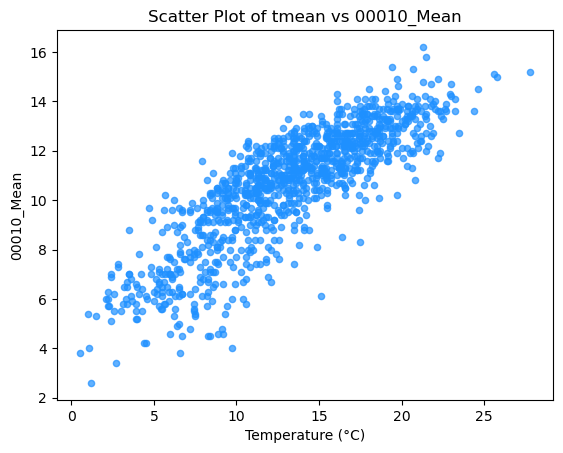

In [6]:
#import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (Replace with your actual data)


# Plot the scatter plot
merged_df.plot(kind='scatter', x='tmean (degrees C)', y='00010_Mean'
               , color='dodgerblue'
               , alpha=0.7 
            #   ,c='Year'   
              )




# Set plot title and labels
plt.title('Scatter Plot of tmean vs 00010_Mean')
plt.xlabel('Temperature (°C)')
plt.ylabel('00010_Mean')

# Show the plot
plt.show()


<Axes: xlabel='tmean (degrees C)', ylabel='00010_Mean'>

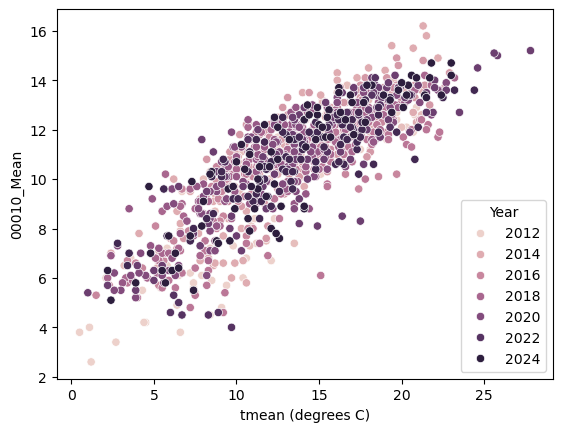

In [7]:
import seaborn as sns
sns.scatterplot(data= merged_df,  x='tmean (degrees C)', y='00010_Mean', hue='Year')

In [8]:
merged_df["w_a"] = merged_df["00010_Mean"]/merged_df["tmean (degrees C)"]
merged_df["w_a"] 

235     0.535714
236     0.527473
237     0.575758
238     0.933333
239     0.954545
          ...   
4428    0.990476
4429    1.356164
4430    1.214286
4431    0.917355
4432    0.745223
Name: w_a, Length: 1093, dtype: float64

<Figure size 800x600 with 0 Axes>

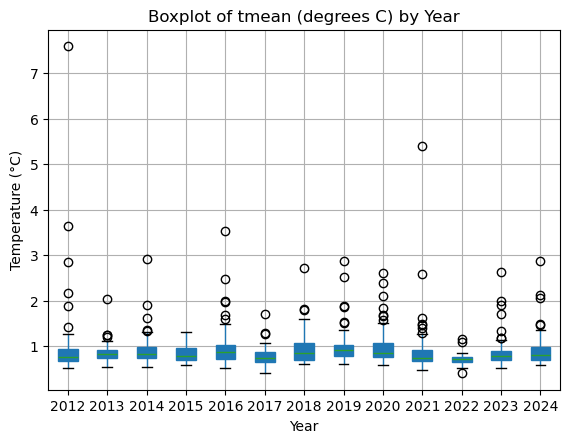

In [9]:
# Create a boxplot for 'tmean (degrees C)' grouped by 'Year'
plt.figure(figsize=(8, 6))
merged_df.boxplot(column="w_a", by='Year', patch_artist=True)

# Set plot title and labels
plt.title('Boxplot of tmean (degrees C) by Year')
plt.suptitle('')  # To remove the default "Boxplot" title
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

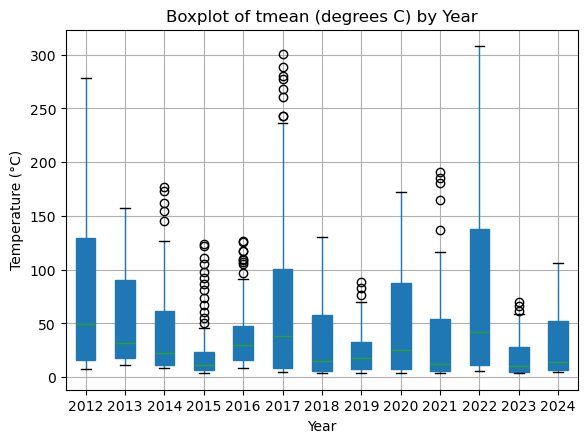

In [10]:
plt.figure(figsize=(8, 6))
dailyStreamflow_df.boxplot(column="00060_Mean", by='Year', patch_artist=True)

# Set plot title and labels
plt.title('Boxplot of tmean (degrees C) by Year')
plt.suptitle('')  # To remove the default "Boxplot" title
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Show the plot
plt.show()

In [12]:
median_buffer = merged_df.groupby('Year')["w_a"].median()
print(merged_df)
print(median_buffer)

           Date  ppt (mm)  tmin (degrees C)  tmean (degrees C)  \
235  2012-06-01      0.78               4.6                8.4   
236  2012-06-02      1.02               3.9                9.1   
237  2012-06-03      0.83               1.6                6.6   
238  2012-06-04      0.00               0.7                4.5   
239  2012-06-05     17.55               1.5                4.4   
...         ...       ...               ...                ...   
4428 2024-08-27      0.65               4.9               10.5   
4429 2024-08-28      0.00               4.0                7.3   
4430 2024-08-29      0.00               1.4                8.4   
4431 2024-08-30      0.00               4.8               12.1   
4432 2024-08-31      0.00               8.9               15.7   

      tmax (degrees C)  tdmean (degrees C)  vpdmin (hPa)  vpdmax (hPa)  \
235               12.3                 2.2          1.08          6.23   
236               14.3                 2.5          2.03   

In [14]:
median_Q = dailyStreamflow_df.groupby('Year')["00060_Mean"].median()


print(median_Q)

print( type( median_Q) )
                           

Year
2012    49.45
2013    31.65
2014    22.45
2015    11.45
2016    29.45
2017    38.15
2018    15.25
2019    17.75
2020    25.05
2021    12.30
2022    41.90
2023    10.03
2024    14.50
Name: 00060_Mean, dtype: float64
<class 'pandas.core.series.Series'>


In [15]:
Q_buffer = pd.merge( median_buffer,  median_Q, on='Year')

print( Q_buffer)

           w_a  00060_Mean
Year                      
2012  0.765388       49.45
2013  0.833333       31.65
2014  0.820055       22.45
2015  0.790646       11.45
2016  0.865077       29.45
2017  0.732955       38.15
2018  0.854900       15.25
2019  0.919821       17.75
2020  0.845696       25.05
2021  0.748494       12.30
2022  0.730201       41.90
2023  0.786957       10.03
2024  0.809892       14.50


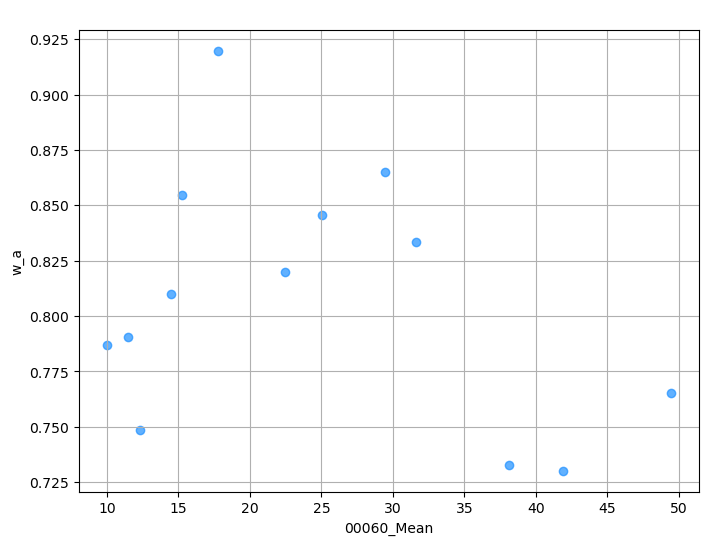

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(    Q_buffer['00060_Mean'], Q_buffer['w_a'], color='dodgerblue', alpha=0.7)
plt.title(' ')
plt.xlabel('00060_Mean')
plt.ylabel('w_a')
plt.grid(True)
